In [1]:
# import libraries
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("whitegrid")

from numpy.random import seed
#from tensorflow import set_random_seed
import tensorflow as tf

from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers

In [6]:
path=""

In [36]:
data = pd.read_csv(path + 'goodx5.csv', dtype=np.float32)
data.columns = ['Joint 1', 'Joint 2', 'Joint 3', 'Joint 4','Joint 5','Joint 6' ]
#data.insert(loc=0, column='Index', value=np.arange(len(data)))
#data = data.drop(['Joint 1','Joint 2','Joint 3', 'Joint 4','Joint 6'], axis=1)
print("Dataset shape:", data.shape)
data.head(126)

Dataset shape: (2842, 6)


,Joint 1,Joint 2,Joint 3,Joint 4,Joint 5,Joint 6
0,-0.000048,0.013194,-0.000548,0.000640,-0.000011,0.000056
1,-0.000548,0.013194,-0.000048,0.000640,-0.000011,0.000056
2,-0.000048,0.013194,-0.000548,0.000640,-0.000011,0.000056
3,-0.000048,0.013194,-0.000548,0.000640,-0.000011,0.000056
4,-0.000048,0.013194,-0.000548,0.000640,-0.000011,0.000056
...,...,...,...,...,...,...
121,-0.000548,0.013194,-0.000048,0.000640,-0.000011,0.000056
122,-0.000048,0.013194,-0.000548,0.000640,-0.000011,0.000056
123,-0.000048,0.013194,-0.000548,0.000640,-0.000011,0.000056
124,-0.000111,0.013194,-0.000548,0.000619,0.000053,0.000077


<function matplotlib.pyplot.show(close=None, block=None)>

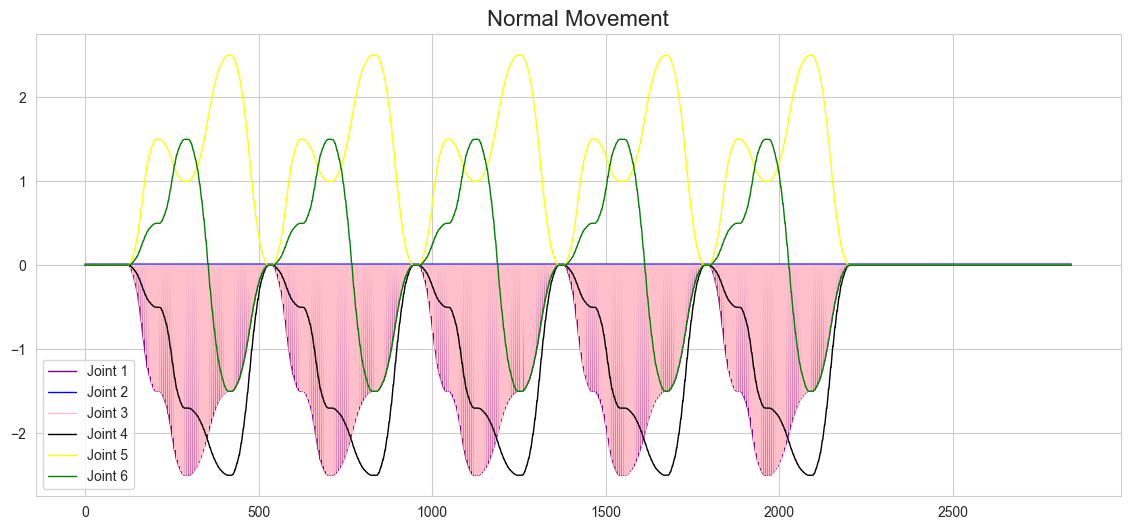

In [37]:
Normal = data
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(Normal['Joint 1'], label='Joint 1', color='purple', animated=True,linewidth=1)
ax.plot(Normal['Joint 2'], label='Joint 2', color='blue', animated=True,linewidth=1)
ax.plot(Normal['Joint 3'], label='Joint 3', color='pink', animated=True,linewidth=1)
ax.plot(Normal['Joint 4'], label='Joint 4', color='black', animated=True,linewidth=1)
ax.plot(Normal['Joint 5'], label='Joint 5', color='yellow', animated=True,linewidth=1)
ax.plot(Normal['Joint 6'], label='Joint 6', color='green', animated=True,linewidth=1)
plt.legend(loc='lower left')
ax.set_title('Normal Movement', fontsize=16)
plt.show

In [11]:
data = pd.read_csv(path+'badx2.csv', dtype=np.float32)
data.columns = ['Joint 1', 'Joint 2', 'Joint 3', 'Joint 4','Joint 5','Joint 6' ]
#data = data.drop(['Joint 1','Joint 2','Joint 3', 'Joint 4','Joint 6'], axis=1)
print("Dataset shape:", data.shape)
data.head(2245)

Dataset shape: (2405, 6)


,Joint 1,Joint 2,Joint 3,Joint 4,Joint 5,Joint 6
0,-0.000743,0.014374,0.000075,0.000019,0.000042,0.000073
1,0.000075,0.014374,-0.000743,0.000019,0.000042,0.000073
2,0.000075,0.014374,-0.000743,0.000019,0.000042,0.000073
3,0.000075,0.014374,-0.000743,0.000019,0.000042,0.000073
4,0.000075,0.014374,-0.000743,0.000019,0.000042,0.000073
...,...,...,...,...,...,...
2240,-0.000148,0.014555,-0.000759,-0.000263,0.000108,-0.000101
2241,-0.000059,0.014555,-0.000759,-0.000040,-0.000088,0.000060
2242,-0.000059,0.014555,-0.000759,-0.000040,-0.000088,0.000060
2243,-0.000059,0.014555,-0.000759,-0.000040,-0.000088,0.000060


<function matplotlib.pyplot.show(close=None, block=None)>

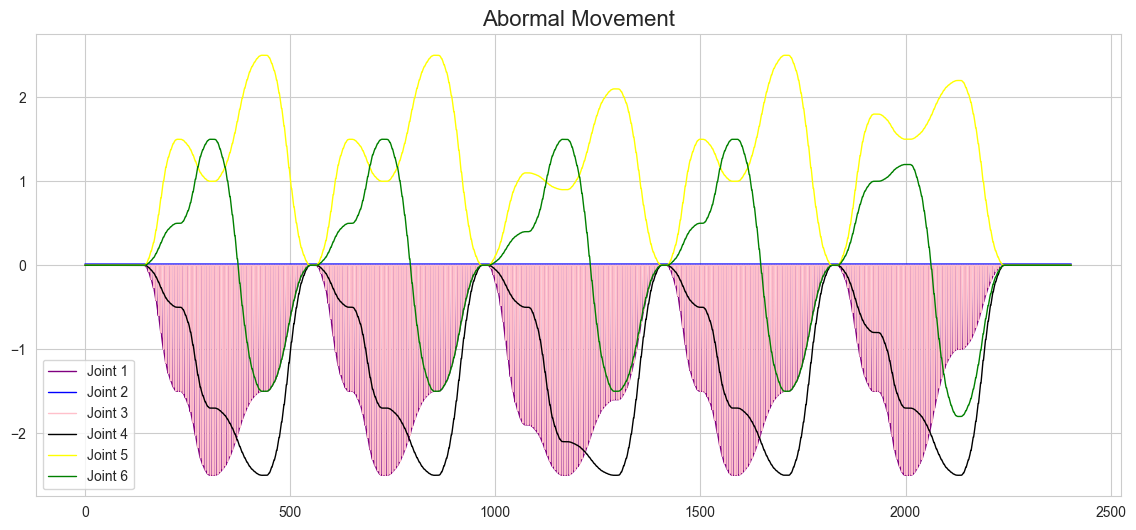

In [12]:
Abnormal = data
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(Abnormal['Joint 1'], label='Joint 1', color='purple', animated=True,linewidth=1)
ax.plot(Abnormal['Joint 2'], label='Joint 2', color='blue', animated=True,linewidth=1)
ax.plot(Abnormal['Joint 3'], label='Joint 3', color='pink', animated=True,linewidth=1)
ax.plot(Abnormal['Joint 4'], label='Joint 4', color='black', animated=True,linewidth=1)
ax.plot(Abnormal['Joint 5'], label='Joint 5', color='yellow', animated=True,linewidth=1)
ax.plot(Abnormal['Joint 6'], label='Joint 6', color='green', animated=True,linewidth=1)
plt.legend(loc='lower left')
ax.set_title('Abormal Movement', fontsize=16)
plt.show

In [13]:
train = Normal
test = Abnormal
print("Training dataset shape:", train.shape)
print("Test dataset shape:", test.shape)

Training dataset shape: (2842, 6)
Test dataset shape: (2405, 6)


In [14]:
# transforming data from the time domain to the frequency domain using fast Fourier transform
train_fft = np.fft.fft(Normal)
test_fft = np.fft.fft(Abnormal)

D:\Capstone-G4\venv\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
D:\Capstone-G4\venv\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<function matplotlib.pyplot.show(close=None, block=None)>

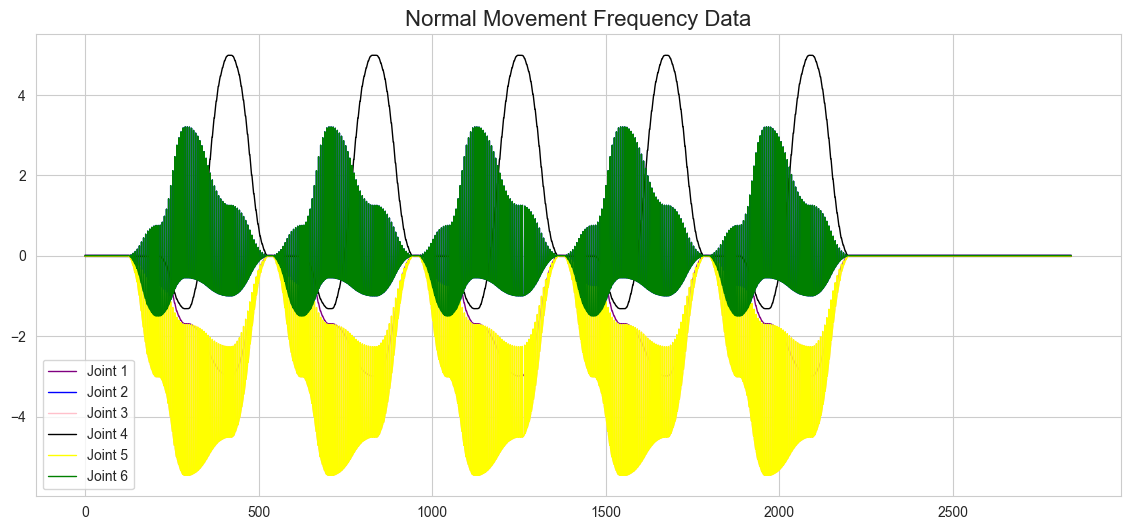

In [15]:
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(train_fft[:,0], label='Joint 1', color='purple', animated=True,linewidth=1)
ax.plot(train_fft[:,1], label='Joint 2', color='blue', animated=True,linewidth=1)
ax.plot(train_fft[:,2], label='Joint 3', color='pink', animated=True,linewidth=1)
ax.plot(train_fft[:,3], label='Joint 4', color='black', animated=True,linewidth=1)
ax.plot(train_fft[:,4], label='Joint 5', color='yellow', animated=True,linewidth=1)
ax.plot(train_fft[:,5], label='Joint 6', color='green', animated=True,linewidth=1)
plt.legend(loc='lower left')
ax.set_title('Normal Movement Frequency Data', fontsize=16)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

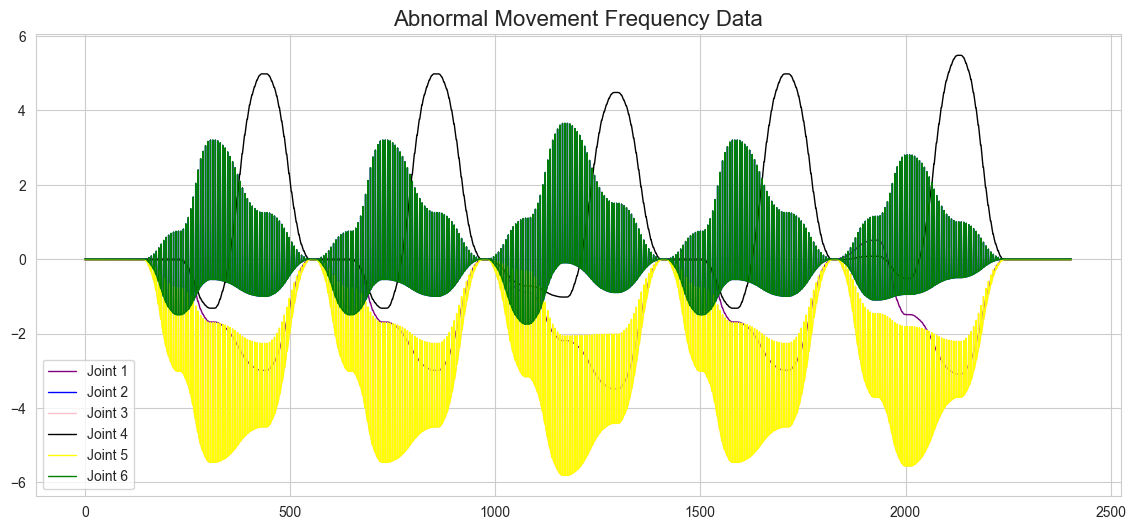

In [16]:
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(test_fft[:,0], label='Joint 1', color='purple', animated=True,linewidth=1)
ax.plot(test_fft[:,1], label='Joint 2', color='blue', animated=True,linewidth=1)
ax.plot(test_fft[:,2], label='Joint 3', color='pink', animated=True,linewidth=1)
ax.plot(test_fft[:,3], label='Joint 4', color='black', animated=True,linewidth=1)
ax.plot(test_fft[:,4], label='Joint 5', color='yellow', animated=True,linewidth=1)
ax.plot(test_fft[:,5], label='Joint 6', color='green', animated=True,linewidth=1)
plt.legend(loc='lower left')
ax.set_title('Abnormal Movement Frequency Data', fontsize=16)
plt.show

In [17]:
X_train = train.to_numpy()
X_test = test.to_numpy()

# reshape inputs for LSTM [samples, timesteps, features]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
print("Training data shape:", X_train.shape)
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
print("Test data shape:", X_test.shape)

Training data shape: (2842, 1, 6)
Test data shape: (2405, 1, 6)


<function matplotlib.pyplot.show(close=None, block=None)>

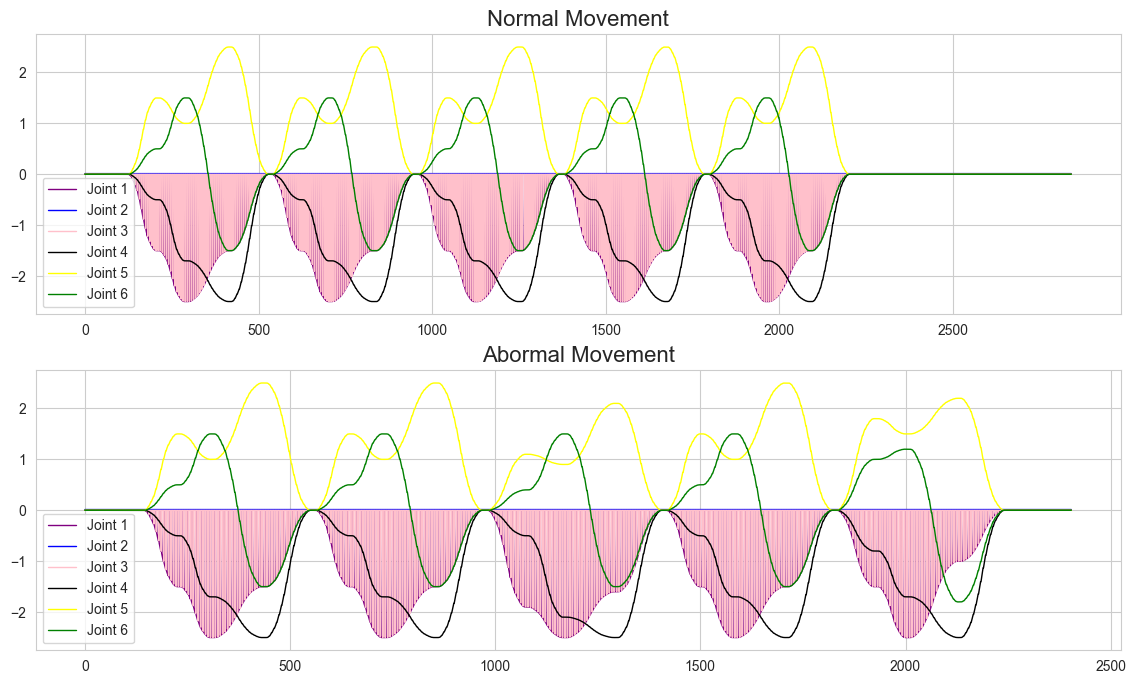

In [18]:
plt.figure(figsize=(14, 8))
plt.subplot(2,1,1)
plt.plot(X_train[:,:,0], label='Joint 1', color='purple', linewidth=1)
plt.plot(X_train[:,:,1], label='Joint 2', color='blue', linewidth=1)
plt.plot(X_train[:,:,2], label='Joint 3', color='pink', linewidth=1)
plt.plot(X_train[:,:,3], label='Joint 4', color='black', linewidth=1)
plt.plot(X_train[:,:,4], label='Joint 5', color='yellow', linewidth=1)
plt.plot(X_train[:,:,5], label='Joint 6', color='green', linewidth=1)
plt.legend(loc='lower left')
plt.title('Normal Movement', fontsize=16)

plt.subplot(2,1,2)
plt.plot(X_test[:,:,0], label='Joint 1', color='purple', linewidth=1)
plt.plot(X_test[:,:,1], label='Joint 2', color='blue', linewidth=1)
plt.plot(X_test[:,:,2], label='Joint 3', color='pink', linewidth=1)
plt.plot(X_test[:,:,3], label='Joint 4', color='black', linewidth=1)
plt.plot(X_test[:,:,4], label='Joint 5', color='yellow', linewidth=1)
plt.plot(X_test[:,:,5], label='Joint 6', color='green', linewidth=1)
plt.legend(loc='lower left')
plt.title('Abormal Movement', fontsize=16)
plt.show


In [19]:
# define the autoencoder network model

def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(32, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L2 = LSTM(16, activation='relu', return_sequences=False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(16, activation='relu', return_sequences=True)(L3)
    L5 = LSTM(32, activation='relu', return_sequences=True)(L4)
    output = TimeDistributed(Dense(X.shape[2]))(L5)
    model = Model(inputs=inputs, outputs=output)
    return model

In [20]:
# create the autoencoder model
tf.random.set_seed(1234)
model = autoencoder_model(X_train)
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1, 6)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 1, 32)          │         4,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 1, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 1, 16)          │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 1, 32)          │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 1, 6)           │           198 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,710 (65.27 KB)

 Trainable params: 16,710 (65.27 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# fit the model to the data
nb_epochs = 200
batch_size = 5
history = model.fit(X_train, X_train, epochs=nb_epochs, batch_size=batch_size,
                    validation_split=0.05).history

Epoch 1/200
540/540 ━━━━━━━━━━━━━━━━━━━━ 56s 15ms/step - loss: 0.4692 - val_loss: 0.0025
Epoch 2/200
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.2374 - val_loss: 0.0015
Epoch 3/200
540/540 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.1342 - val_loss: 0.0016
Epoch 4/200
540/540 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.0901 - val_loss: 0.0058
Epoch 5/200
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0515 - val_loss: 6.2972e-04
Epoch 6/200
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0324 - val_loss: 0.0022
Epoch 7/200
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0257 - val_loss: 0.0063
Epoch 8/200
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0205 - val_loss: 0.0015
Epoch 9/200
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0191 - val_loss: 0.0022
Epoch 10/200
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0169 - val_loss: 0.0021
Epoch 11/200
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0158 - val_loss: 0.0021
Epoch 12/200
540/540 ━━━━━━━━━━━

In [22]:
model_name = "ROS_AE_noscaling"
model_file = model_name+".h5"
model_history = model_name+"_history.npy"

In [23]:
model.save(path+model_file)
np.save(path+model_history, history)

In [24]:
from keras.utils.vis_utils import plot_model
model = tf.keras.models.load_model(path+model_file)
history=np.load(path+model_history,allow_pickle='TRUE').item()
plot_model(model, to_file=path+model_name+'.png', show_shapes=True, show_layer_names=True)

ModuleNotFoundError: No module named 'keras.utils.vis_utils'

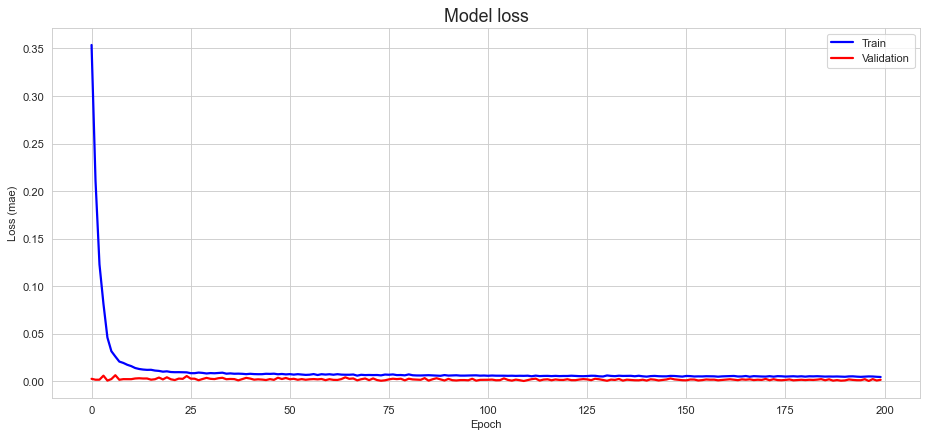

In [25]:
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

89/89 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step


C:\Users\chris\AppData\Local\Temp\ipykernel_19380\1003553330.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scored_train['Loss_mae'], bins = 20, kde= True, color = 'blue');


<function matplotlib.pyplot.show(close=None, block=None)>

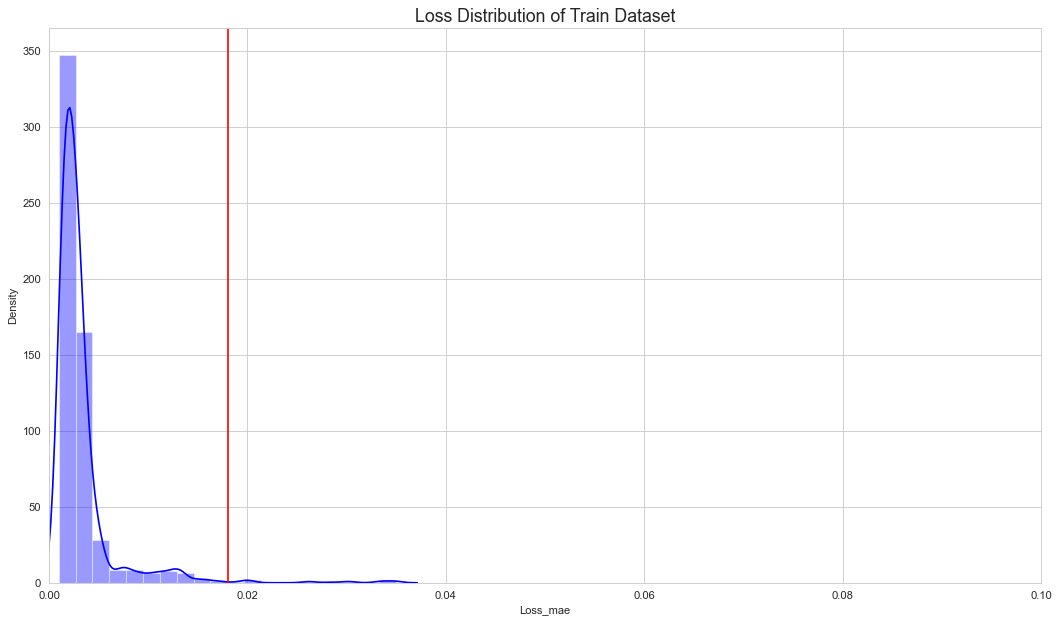

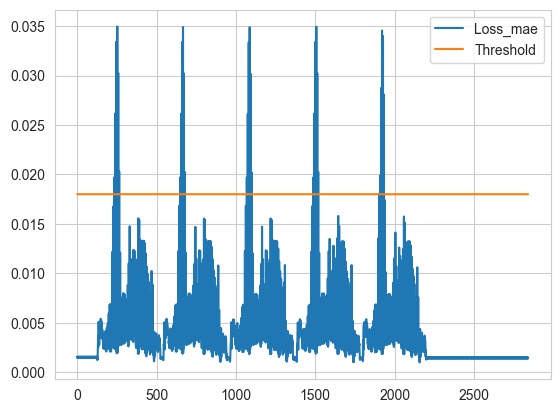

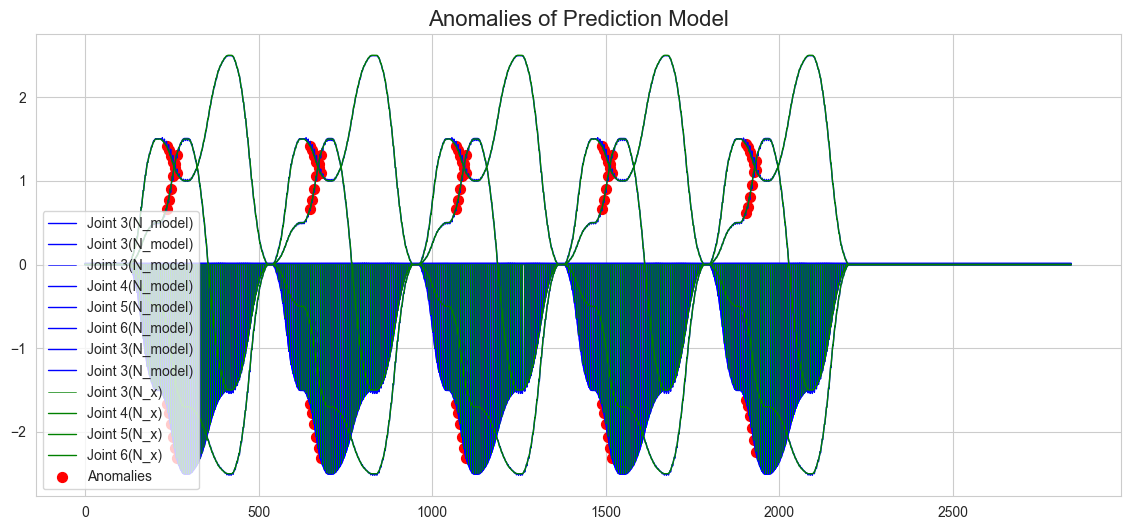

In [26]:
# plot the loss distribution of the training set
X_pred_train = model.predict(X_train)
X_pred_train = X_pred_train.reshape(X_pred_train.shape[0], X_pred_train.shape[2])
X_pred_train = pd.DataFrame(X_pred_train, columns=train.columns)
X_pred_train.index = train.index

scored_train = pd.DataFrame(index=train.index)
Xtrain = X_train.reshape(X_train.shape[0], X_train.shape[2])
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-Xtrain), axis = 1)
scored_train['Threshold'] = 0.018
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']

plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution of Train Dataset', fontsize=16)
sns.distplot(scored_train['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.axvline(x=scored_train['Threshold'][0], color='r', linestyle='-')
#plt.xlim([0.0,.5])
plt.xlim([0.0,.1])
scored_train.plot()

# There are imperfection of the prediction model, hence need to tune the acceptable threshold
# in order to accept the  prediction model anomalies
#train_pred = scaler.inverse_transform(X_pred_train)
#train_pred = pd.DataFrame(train_pred, columns=train.columns)
train_pred = pd.DataFrame(X_pred_train, columns=train.columns)
train_pred.index = train.index

model_anomalies = train.iloc[scored_train.index[scored_train['Anomaly']==True]]

fig, ax = plt.subplots(figsize=(14,6))
ax.plot(train_pred['Joint 1'], label='Joint 3(N_model)', color='blue', linewidth=1)
ax.plot(train_pred['Joint 2'], label='Joint 3(N_model)', color='blue', linewidth=1)
ax.plot(train_pred['Joint 3'], label='Joint 3(N_model)', color='blue', linewidth=0.5)
ax.plot(train_pred['Joint 4'], label='Joint 4(N_model)', color='blue', linewidth=1)
ax.plot(train_pred['Joint 5'], label='Joint 5(N_model)', color='blue', linewidth=1)
ax.plot(train_pred['Joint 6'], label='Joint 6(N_model)', color='blue', linewidth=1)

ax.plot(train['Joint 1'], label='Joint 3(N_model)', color='blue', linewidth=1)
ax.plot(train['Joint 2'], label='Joint 3(N_model)', color='blue', linewidth=1)
ax.plot(train['Joint 3'], label='Joint 3(N_x)', color='green', linewidth=0.5)
ax.plot(train['Joint 4'], label='Joint 4(N_x)', color='green', linewidth=1)
ax.plot(train['Joint 5'], label='Joint 5(N_x)', color='green', linewidth=1)
ax.plot(train['Joint 6'], label='Joint 6(N_x)', color='green', linewidth=1)

ax.scatter(model_anomalies.index, model_anomalies['Joint 3'], label='Anomalies', color='red', alpha=1, s=50)
ax.scatter(model_anomalies.index, model_anomalies['Joint 4'], color='red', alpha=1, s=50)
ax.scatter(model_anomalies.index, model_anomalies['Joint 5'], color='red', alpha=1, s=50)
ax.scatter(model_anomalies.index, model_anomalies['Joint 6'], color='red', alpha=1, s=50)
plt.legend(loc='lower left')
ax.set_title('Anomalies of Prediction Model', fontsize=16)
plt.show

76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


C:\Users\chris\AppData\Local\Temp\ipykernel_19380\3587091994.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scored_test['Loss_mae'], bins = 20, kde= True, color = 'blue');


<Axes: >

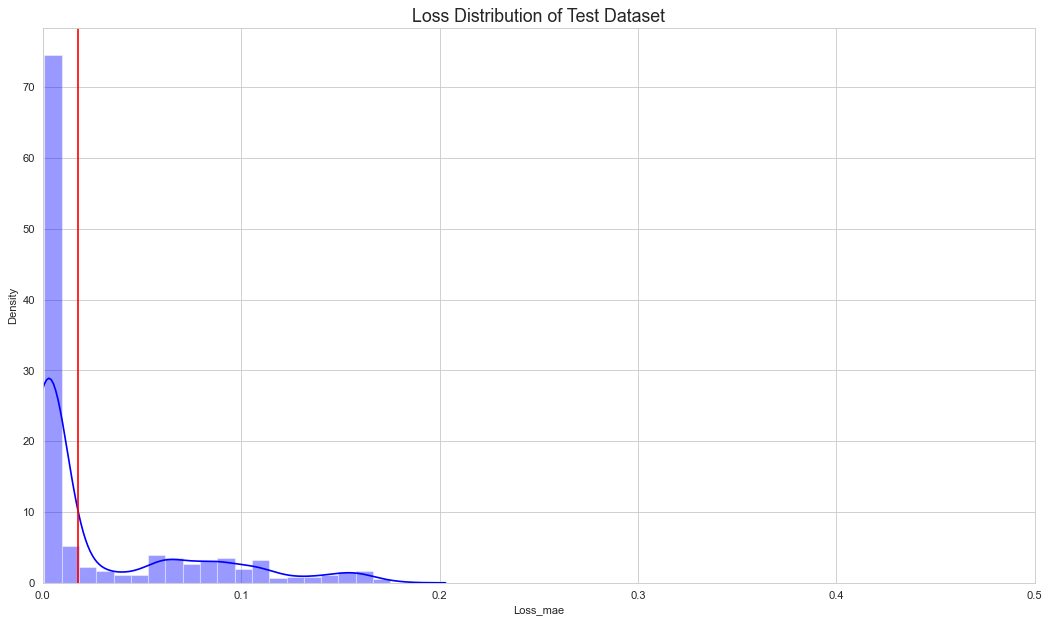

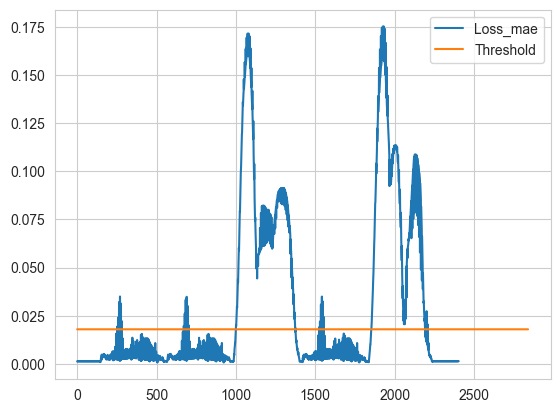

In [27]:
# plot the loss distribution of the test set
X_pred_test = model.predict(X_test)
X_pred_test = X_pred_test.reshape(X_pred_test.shape[0], X_pred_test.shape[2])
X_pred_test = pd.DataFrame(X_pred_test, columns=train.columns)
X_pred_test.index = test.index

scored_test = pd.DataFrame(index=train.index)
Xtest = X_test.reshape(X_test.shape[0], X_test.shape[2])

scored_test['Loss_mae'] = np.mean(np.abs(X_pred_test-Xtest), axis = 1)
scored_test['Threshold'] = scored_train['Threshold']
scored_test['Anomaly'] = scored_test['Loss_mae'] > scored_test['Threshold']

plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution of Test Dataset', fontsize=16)
sns.distplot(scored_test['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.axvline(x=scored_test['Threshold'][0], color='r', linestyle='-')
plt.xlim([0.0,.5])
scored_test.plot()

In [28]:
print("Number of Anomalies found: \n", scored_test['Anomaly'].value_counts())
print("\nLocation of Anomalies found: \n", scored_test.index[scored_test['Anomaly']==True])

Number of Anomalies found: 
 Anomaly
False    2107
True      735
Name: count, dtype: int64

Location of Anomalies found: 
 Index([ 252,  258,  264,  270,  276,  282,  672,  678,  684,  690,
       ...
       2185, 2186, 2187, 2188, 2189, 2190, 2191, 2196, 2202, 2208],
      dtype='int64', length=735)


<function matplotlib.pyplot.show(close=None, block=None)>

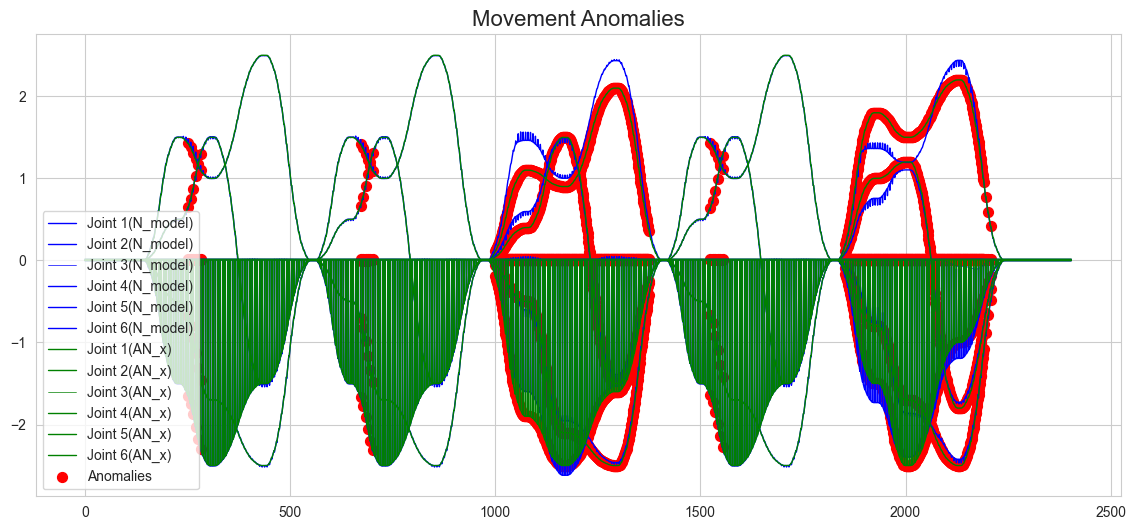

In [29]:
test_pred = pd.DataFrame(X_pred_test, columns=test.columns)
test_pred.index = test.index

anomalies = test.iloc[scored_test.index[scored_test['Anomaly']==True]]

fig, ax = plt.subplots(figsize=(14,6))
ax.plot(test_pred['Joint 1'], label='Joint 1(N_model)', color='blue', linewidth=1)
ax.plot(test_pred['Joint 2'], label='Joint 2(N_model)', color='blue', linewidth=1)
ax.plot(test_pred['Joint 3'], label='Joint 3(N_model)', color='blue', linewidth=0.5)
ax.plot(test_pred['Joint 4'], label='Joint 4(N_model)', color='blue', linewidth=1)
ax.plot(test_pred['Joint 5'], label='Joint 5(N_model)', color='blue', linewidth=1)
ax.plot(test_pred['Joint 6'], label='Joint 6(N_model)', color='blue', linewidth=1)

ax.plot(test['Joint 1'], label='Joint 1(AN_x)', color='green', linewidth=1)
ax.plot(test['Joint 2'], label='Joint 2(AN_x)', color='green', linewidth=1)
ax.plot(test['Joint 3'], label='Joint 3(AN_x)', color='green', linewidth=0.5)
ax.plot(test['Joint 4'], label='Joint 4(AN_x)', color='green', linewidth=1)
ax.plot(test['Joint 5'], label='Joint 5(AN_x)', color='green', linewidth=1)
ax.plot(test['Joint 6'], label='Joint 6(AN_x)', color='green', linewidth=1)

ax.scatter(anomalies.index, anomalies['Joint 1'], label='Anomalies', color='red', alpha=1, s=50)
ax.scatter(anomalies.index, anomalies['Joint 2'], color='red', alpha=1, s=50)
ax.scatter(anomalies.index, anomalies['Joint 3'], color='red', alpha=1, s=50)
ax.scatter(anomalies.index, anomalies['Joint 4'], color='red', alpha=1, s=50)
ax.scatter(anomalies.index, anomalies['Joint 5'], color='red', alpha=1, s=50)
ax.scatter(anomalies.index, anomalies['Joint 6'], color='red', alpha=1, s=50)
plt.legend(loc='lower left')
ax.set_title('Movement Anomalies', fontsize=16)
plt.show